In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import torch
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd


Use Monte Carlo simulation to plot the distribution of y ~ Poisson(l), where l ~
gamma(shape=500, rate=0.05). On the same plot, show the distribution y ~
Poisson(l=10000). Which has larger variance?


In [37]:
from scipy.stats.distributions import poisson, gamma

n = 1000

I = gamma.rvs(a=500, loc=0.05, size=n)
y = poisson.rvs(I)

In [38]:
y_2 = poisson.rvs(mu=10000, size=n)

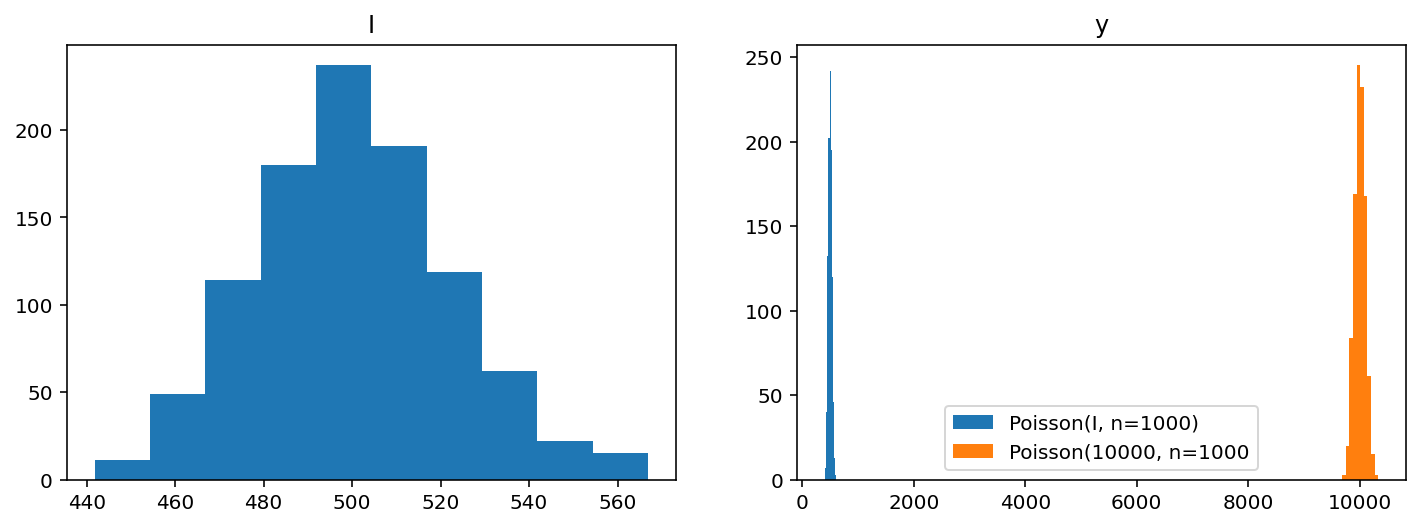

In [43]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(I)
plt.title("I")

plt.subplot(1, 2, 2)
plt.hist(y, label=f"Poisson(I, n={n})")
plt.hist(y_2, label=f"Poisson(10000, n={n}")
plt.title("y")
plt.legend()

In [119]:
import random

p_io = 0.2
p_ii = 1-p_io

p_oi = 0.01
p_oo = 1-p_oi

n = 30

random.seed()

n_in = n//2
n_out = n-n_in
n_in, n_out


(15, 15)

In [120]:
num_samples = 10000
in_out_arr = np.zeros((num_samples, 2)).astype(int)

In [121]:
from scipy.stats.distributions import binom

for i in range(num_samples):
    new_out = binom.rvs(n_in, p_io)
    new_in = binom.rvs(n_out, p_oi)

    n_in = n_in - new_out + new_in
    n_out = n-n_in

    in_out_arr[i, ] = np.array([n_in, n_out])

Average # bees inside = 1.384
P(# bees inside) = 0.242


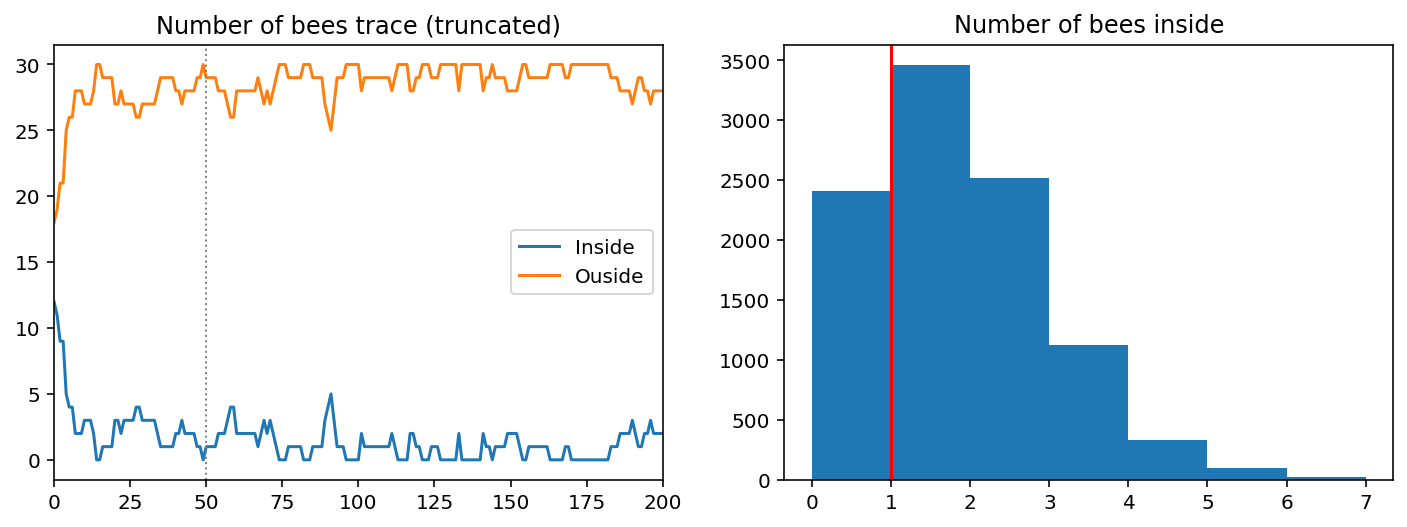

In [167]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(in_out_arr[:, 0], label="Inside")
plt.plot(in_out_arr[:, 1], label="Ouside")
plt.axvline(50, c='gray', linestyle='dotted', lw=1)
plt.xlim(0, 200)
plt.legend()
plt.title("Number of bees trace (truncated)")

plt.subplot(1, 2, 2)
in_samples = in_out_arr[50:, 0]
plt.hist(in_samples, bins=np.arange(0, 8))
plt.axvline(1, c='red', linestyle='solid', lw=1.5)
plt.title("Number of bees inside")

print(f"Average # bees inside = {in_samples.mean():.3f}")
print(f"P(# bees inside) = {np.mean(in_samples == 0):.3f}")
